# Spredning på endelig brønd
Denne Python-kode skal illustrere forskellige spredningsløsninger til den endelige brønd i kapitel 2.6 i Griffith's "Introduction to Quantum Mechanics". Potentialet vi undersøger er på formen 

$$
V(x) = 
\begin{cases}
-V_0, & -a\leq x\leq a\\
0, & a<|x|
\end{cases}
$$

Bemærk, vi har sat $\hbar = m = 1$ i de aktuelle formler. Nedenfor importerer vi de nødvendige biblioteker og definerer dybden $V_0$ og bredden $a$ af potentialet.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Dybden af potentialet
V0 = 8

# Bredden af potentialet
a = 10

Vi ønsker at starte med en gaussisk bølgefunktion på formen
$$
\Psi(0,x) = N \exp\left[ -\frac{1}{4}\left(\frac{(x-x_0)}{\sigma}\right)^2 + ik_0x\right],
$$
hvor $x_0$ er startmiddelpositionen  for vores partikkel, $\sigma$ er et udtryk for bredden af bølgefunktionen, $k_0$ er startmiddelimpulsen (i enheder hvor $m=\hbar=1$) og $N$ er en normeringsfaktor. Nedenfor plotter vi potentialet samt startbølgefunktionen.

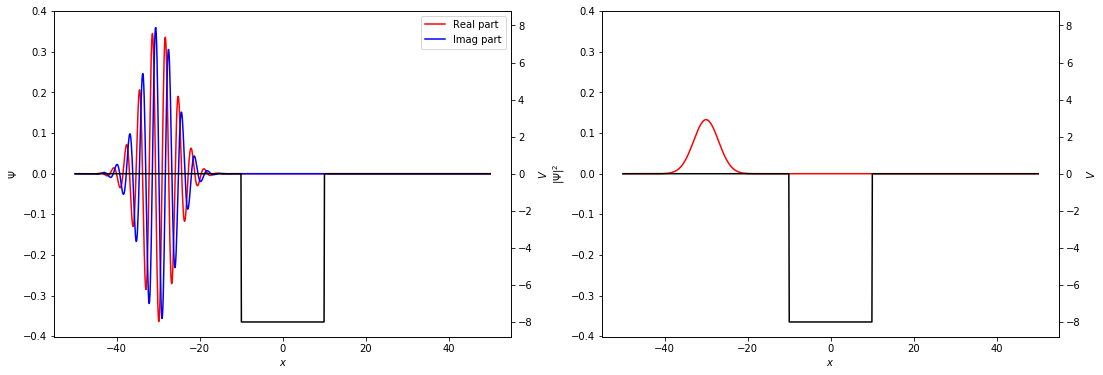

In [3]:
# Parametre for Psi(0,x)
x0 = -30
sigma = 3
k0 = 2

# Definer x-aksen
L = 50
x_arr = np.linspace(-L, L, 1000)

# Nu regner vi Psi(0, x)
Psi0 = np.exp(-.25*(x_arr-x0)**2/sigma**2+1j*k0*x_arr)
Psi0 /= np.sqrt(np.trapz(np.abs(Psi0)**2, x_arr))

# Og potentialet regnes, så vi kan plotte det nedenfor
V = np.zeros(np.size(x_arr))
V[np.abs(x_arr)<=a] = -V0

# Lav figure med to axes:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# På første axes plotter vi potentialet og startbølgefunktionen
psi_ylim = 1.1*np.max(np.abs(Psi0))
V_lim = 1.1*np.abs(V0)
axs[0].plot(x_arr, np.real(Psi0), color='r', label='Real part')
axs[0].plot(x_arr, np.imag(Psi0), color='b', label='Imag part')
axs[0].set_ylim(-psi_ylim, psi_ylim)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$\Psi$')
axs[0].legend()
ax_pot1 = axs[0].twinx()
ax_pot1.plot(x_arr, V, color='k')
ax_pot1.set_ylim(-V_lim, V_lim)
ax_pot1.set_ylabel('$V$')
axs[1].plot(x_arr, np.abs(Psi0)**2, color='r')
axs[1].set_ylim(-psi_ylim, psi_ylim)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel('$|\Psi|^2$')
ax_pot2 = axs[1].twinx()
ax_pot2.plot(x_arr, V, color='k')
ax_pot2.set_ylim(-V_lim, V_lim)
ax_pot2.set_ylabel('$V$')
plt.show()

Vi vil nu beregne vores startbølgefunktion som en superposition af stationære tilstande. De stationære tilstande er udled i kapitel 2.6 og kan skrives som 
$$
\psi_k(x) = 
\begin{cases}
Ae^{ikx}+Be^{-ikx} & x\leq-a\\
C\sin (la)+D\cos(la) & -a<x<a\\
Fe^{ikx} & a\leq x
\end{cases},
$$
hvor $l = \sqrt{2(E+V_0)}$ i vores enheder med ($\hbar = m = 1$). Ligesom med spredning på $\delta$-funktionspotentialet sætter vi $A = 1$. Så bliver de andre koefficienter
$$
\begin{split}
F &= \frac{e^{-2ika}}{\cos (la)-i\frac{k^2+l^2}{2kl}\sin(2la)}  \qquad\quad\text{(2.171)},\\
B &= i\frac{l^2-k^2}{2kl}\sin(2la)F                             \qquad\qquad\quad\text{(2.170)},\\
C &= \left[\sin(la) + i\frac{k}{l}\cos(la)\right]e^{ika}F       \quad\text{(opg. 2.32)},\\
D &= \left[\cos(la) - i\frac{k}{l}\sin(la)\right]e^{ika}F       \quad\text{(opg. 2.32)}.
\end{split}
$$
Transmissionskoefficienten er så give ved 
$$
T = \frac{1}{|F|^2}.
$$

Vi gør nu som i tilfældet med den fri partikel og skriver:
$$
\Psi(x,t) = \frac{1}{\sqrt{2\pi}}\int_0^{\infty} \phi(k) \psi_k(x) e^{-i\frac{\hbar k^2}{2m}t} dk,
$$
hvilket ligner ligning (2.101) rigtigt meget, men med integration fra 0 til $\infty$ og med ovenstående $\psi_k(x)$ i stedet for $e^{ikx}$. Til tiden $t=0$ har vi:
$$
\Psi(x,0) = \frac{1}{\sqrt{2\pi}}\int_0^{\infty} \phi(k) \psi_k(x) dk \approx \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(k) e^{ikx} dk,
$$
siden vi for en passende lokaliseret startbølgefunktion (godt til venstre for $x=0$) ligner en fri partikel. Vi kan også blot antage at $\phi(k) = 0$ for $k < 0$ efter andet lighedstegn ovenfor. Vi kan derfor benytte ligning (2.104) til at finde $\phi(k)$.

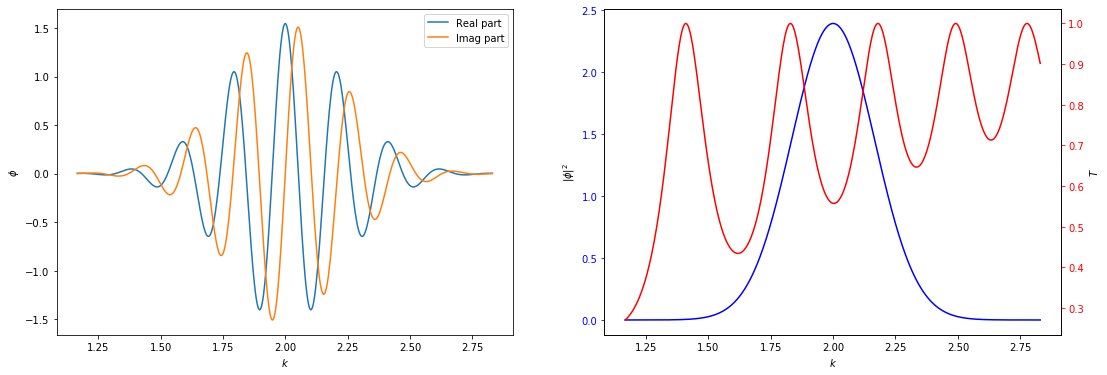

In [4]:
sigma_k = 1/(2*sigma)
dk = sigma_k/50
k_min = np.max([dk, k0-5*sigma_k]) # Vi ønsker ikke negative k
k_max = k0+5*sigma_k
k_arr = np.arange(k_min, k_max, step=dk)
E_arr = k_arr**2 / 2
l_arr = np.sqrt(2*(E_arr+V0)+0j)

# For hvert k skal vi beregne beta, B, C, D og F. Vi antager A = 1 i ligning [2.166+167]:
F = np.exp(-2*1j*k_arr*a)/(np.cos(2*l_arr*a)-1j*(k_arr**2+l_arr**2)/(2*k_arr*l_arr)*np.sin(2*l_arr*a)) # Ligning [2.171].
B = 1j*np.sin(2*l_arr*a)/(2*k_arr*l_arr)*(l_arr**2-k_arr**2)*F  # [2.170].
C = (np.sin(l_arr*a)+ 1j*k_arr/l_arr*np.cos(l_arr*a))*np.exp(1j*k_arr*a)*F  # Se opgave 2.32.
D = (np.cos(l_arr*a)- 1j*k_arr/l_arr*np.sin(l_arr*a))*np.exp(1j*k_arr*a)*F  # Se opgave 2.32.
T = np.abs(F)**2


# Beregn phi(k) fra ligning [2.104] - eller en generelisering af [2.104]:
phi_arr = []
for k in k_arr:
    phi_arr.append(np.trapz(Psi0*np.exp(-1j*k*x_arr), x_arr)/np.sqrt(2*np.pi))
phi_arr = np.array(phi_arr)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs[0].plot(k_arr, np.real(phi_arr), label='Real part')
axs[0].plot(k_arr, np.imag(phi_arr), label='Imag part')
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$\phi$')
axs[0].legend()
axs[1].plot(k_arr, np.abs(phi_arr)**2, color='b')
axs[1].set_xlabel('$k$')
axs[1].set_ylabel('$|\phi|^2$')
axs_T = axs[1].twinx()
axs_T.plot(k_arr, T, color='r')
axs_T.set_ylabel('$T$')
axs_T.tick_params(axis='y', colors='r')
axs[1].tick_params(axis='y', colors='b')
plt.show()

Nu hvor vi kender $\phi(k)$, er vi klar til at beregne den tidsafhængige bølgefunktion, som bliver (her med $\hbar = m = 1$):
$$
\Psi(x,t) = \frac{1}{\sqrt{2\pi}}\int_0^{\infty}\phi(k)\psi_k(x) e^{-i\frac{k^2}{2} t} dk \approx  \sum_k \left\{ \frac{\phi(k) dk}{\sqrt{2\pi}}\right\} \psi_k(x) e^{-i\frac{k^2}{2} t} \equiv \sum_k c_k \psi_k(x) e^{-i\frac{k^2}{2}t},
$$
hvor approksimationen svarer til at skrive integralet som en Riemann-sum (med $dk$ som defineret i koden ovenfor) og sidste lighedstegn definerer $c_k$ som tallet i Tuborg-parenteserne.

Nedenfor skriver vi en update funktion, der opdaterer koefficienterne $c_k\rightarrow c_k e^{-i\frac{k^2}{2}t}$, og regner summen ovenfor.

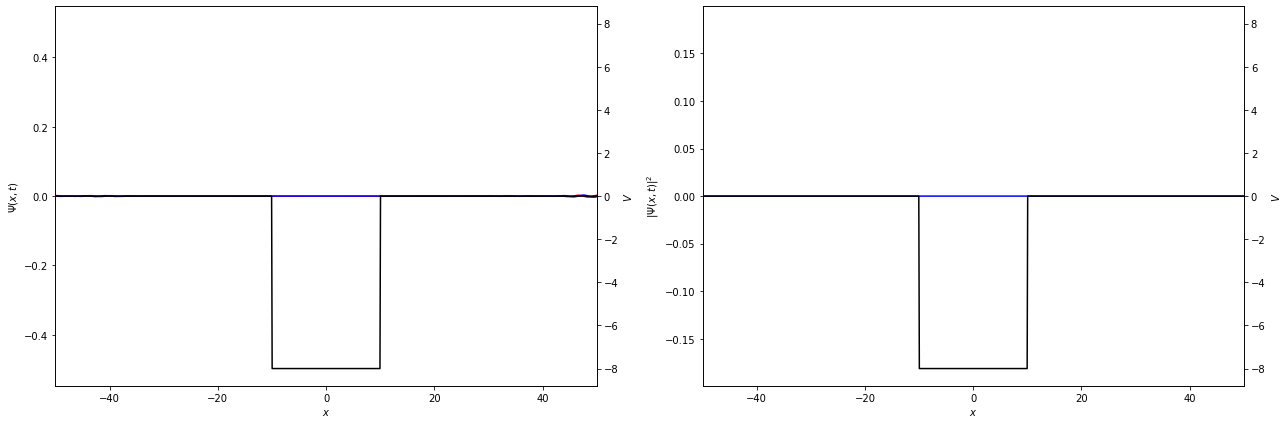

In [5]:
# De tider hvor bølgefunktionen bestemmes
t_arr = np.linspace(0, 4*np.abs(x0)/k0, 50)

# Gør figuren klar
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
re_line, = axs[0].plot([], [], color='r')
im_line, = axs[0].plot([], [], color='b')
axs[0].set_xlim(-L, L)
axs[0].set_ylim(-np.max(np.abs(Psi0))*1.5, np.max(np.abs(Psi0))*1.5)
axs[0].set_xlabel('$x$')
axs[0].set_ylabel(r'$\Psi(x,t)$')
ax_pot1 = axs[0].twinx()
ax_pot1.plot(x_arr, V, color='k')
ax_pot1.set_ylim(-V_lim, V_lim)
ax_pot1.set_ylabel('$V$')
abs_line, = axs[1].plot([], [], color='b')
axs[1].set_xlim(-L, L)
axs[1].set_ylim(-np.max(np.abs(Psi0)**2)*1.5, np.max(np.abs(Psi0)**2)*1.5)
axs[1].set_xlabel('$x$')
axs[1].set_ylabel(r'$|\Psi(x,t)|^2$')
ax_pot2 = axs[1].twinx()
ax_pot2.plot(x_arr, V, color='k')
ax_pot2.set_ylim(-V_lim, V_lim)
ax_pot2.set_ylabel('$V$')
plt.tight_layout()


# Opstil matrix med de stationære tilstande som søjler
psi_k_mat = []
for k_idx, k in enumerate(k_arr):
    psi_k = np.zeros(np.size(x_arr), dtype = complex)
    
    # Først regnes tilstanden for x<-a
    filt = x_arr<=-a 
    psi_k[filt] += np.exp(1j*k*x_arr[filt])
    psi_k[filt] += B[k_idx] * np.exp(-1j*k*x_arr[filt])
    
    # Så inde i brønden -a<x<a
    filt = (-a < x_arr) * (x_arr < a)
    psi_k[filt] += C[k_idx]*np.sin(l_arr[k_idx]*x_arr[filt])
    psi_k[filt] += D[k_idx]*np.cos(l_arr[k_idx]*x_arr[filt])
    
    # og til sidst for a<x
    filt = a <= x_arr
    psi_k[filt] += F[k_idx] * np.exp(1j*k*x_arr[filt])
    
    psi_k_mat.append(psi_k)

# Så laver om til et numpy array og transponerer, så tilstandene er søjlerne
psi_k_mat = np.array(psi_k_mat).T


# Dette er funktionen der opdaterer figuren hver frame.
def update(i):
    # t for den pågældende frame
    t = t_arr[i] 
    
    # Opdater phi_t
    phi_t = phi_arr * np.exp(-1j*E_arr * t) * dk 
    
    # Regn bølgefunktionen til t
    psi_t = psi_k_mat @ phi_t / np.sqrt(2*np.pi)
    
    # Opdater artists for figur
    re_line.set_data(x_arr, np.real(psi_t))
    im_line.set_data(x_arr, np.imag(psi_t))
    abs_line.set_data(x_arr, np.abs(psi_t)**2)
    return re_line, im_line, abs_line


#FuncAnimation klassen kan så lave animationen
anim = FuncAnimation(fig,  # Figuren animationen skal lave på
                     update,  # funktionen der opdaterer figuren hver frame
                     frames=len(t_arr),  # antal frames
                     interval=50,  # antal ms mellem hver frame
                     blit=True).to_jshtml()
# HTML funktionen fra IPython.display modulet kan afspille animation i notebooken
HTML(anim)